In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from ipywidgets import interact
import pandas as pd
import seaborn as sns
from scipy.signal import lfilter


In [3]:
data_old = np.load('train.npy')
data_old.shape


(8, 8, 12220)

In [4]:
data_new = np.load("train_new.npy")
data_new.shape

(8, 8, 12220)

In [5]:
data_old[0]

array([[-1.02547480e+00, -1.01867676e+00, -9.90642342e-01, ...,
        -1.01562353e+00, -1.02817619e+00, -1.00278518e+00],
       [-9.74673983e-01, -9.78321573e-01, -9.74234960e-01, ...,
        -2.69007628e-04,  6.28844964e-03,  2.95045098e-03],
       [-1.00550931e+00, -1.00269290e+00, -1.00568616e+00, ...,
         5.21056761e-03,  9.76609461e-03, -1.70789148e-01],
       ...,
       [-9.75588495e-01, -9.87673201e-01, -1.30220510e+00, ...,
        -8.00990304e-03,  3.12433990e-03, -6.57816654e-03],
       [-9.90781576e-01, -9.95390259e-01, -9.86025337e-01, ...,
        -2.49284512e-02, -4.01528804e-02,  9.84914992e-03],
       [-1.00214040e+00, -1.00397939e+00, -9.70682312e-01, ...,
        -1.00560045e+00, -9.99962962e-01, -1.00177486e+00]])

In [6]:
block = 0
res = np.zeros((8, 8, 47))
for row in range(8):
    
    for col in range(8):

        block = np.clip(data_new[row,col,:], -1, 1)
        for n in range(47):
            res[row,col,n] = np.rint(np.mean(block[260*n:260*n+259]))


result = res


def conf_matrix(data):

    def plot_frame(frame):
        fig, ax = plt.subplots()
        im = ax.imshow(data[:, :, frame], cmap='viridis', interpolation='nearest', extent=[0.5, 8.5, 8.5, 0.5])
        plt.title(f"Frame {frame + 1}")
        plt.colorbar(im)
        
        for i in range(8):
            for j in range(8):
                value = data[i, j, frame]
                plt.text(j + 1, i + 1, f'{value:.2f}', color='white', ha='center', va='center', fontsize=8)

        plt.xticks(range(1, 9))
        plt.yticks(range(1, 9))
        plt.show()

    # Create an interactive scroller
    interact(plot_frame, frame=(0, data.shape[2] - 1, 1))



In [7]:
conf_matrix(res)

interactive(children=(IntSlider(value=23, description='frame', max=46), Output()), _dom_classes=('widget-inter…

In [8]:
pred_ = np.load("dummy_test_dataset.npy")
print(pred_.shape)

moves = [[7,3, 4,3],
         [3,2, 4,3],
         [7,4, 1,4],
         [1,0, 2,1],
         [4,5, 4,3],
         [2,1, 3,0],
         [6,1, 4,1],
         [3,0, 4,0],
         [4,3, 5,2],
         [2,3, 3,3],
         [1,4, 1,0],
         [0,0, 1,1],
         [1,0, 1,1],
         [3,3, 4,2],
         [5,2, 2,5],
         [4,0, 5,0],
         [2,5, 2,0],
         [5,0, 4,1],
         [6,2, 5,2],
         [4,1, 5,2],
         [2,0, 7,0],
         [5,2, 6,3],
         [7,0, 6,1],
         [6,3, 7,3],
         [5,7, 7,5],
         [0,3, 6,3],
         [1,1, 1,3],
         [6,3, 1,3],
         [7,5, 4,2],
         [3,1, 4,2],
         [6,1, 0,7],
         [1,3, 5,3],
         [0,7, 0,0],
         [4,2, 5,2],
         [0,0, 4,0],
         [7,3, 7,4],
         [5,5, 4,5],
         [1,5, 3,5],
         [7,1, 7,2],
         [5,3, 6,3],
         [4,0, 1,0]
         ]

for j in range(260):        
    pred_[:,:,j] = result[:,:,46]

print(result[0,0,46])
for i in range(41):
    value = 0
    if i%2==0: value = 1
    else: value = -1 

    for j in range(260): 
        
        pred_[moves[i][0],moves[i][1],260*i+j] = 0
        pred_[moves[i][2],moves[i][3],260*i+j] = value

    if i < 40:
        pred_[:,:,(i+1)*260:(i+1)*260+260] = pred_[:,:,i*260:i*260+260]

pred_[:,:,10659] = pred_[:,:,10658]

#np.save("prediction.npy", pred_)

(8, 8, 10660)
-1.0


In [9]:
pred_

array([[[-1., -1., -1., ...,  0.,  0.,  0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-1., -1., -1., ...,  0.,  0.,  0.]],

       [[-1., -1., -1., ...,  1.,  1.,  1.],
        [-0., -0., -0., ...,  0.,  0.,  0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-1., -1., -1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ...,  0.,  0.,  0.],
        [-0., -0., -0., ...,  0.,  0.,  0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-1., -1., -1., ...,  0.,  0.,  0.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 1.,  1.,  1., ...,  0.,  0.,  0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -1., -1., -1.

In [10]:
conf_matrix(data_new)

interactive(children=(IntSlider(value=6109, description='frame', max=12219), Output()), _dom_classes=('widget-…

### concetenate test data and future data

In [11]:
total_data = np.concatenate((data_new, pred_), axis=2)
total_data.shape

(8, 8, 22880)

In [12]:
total_data

array([[[-1.00993789e+00, -9.53324801e-01, -9.97342991e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.00615286e+00, -9.90284780e-01, -1.07147802e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [-1.00171308e+00, -1.01434335e+00, -9.94572829e-01, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        ...,
        [-9.96720734e-01, -9.98750420e-01, -9.86957079e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.69680274e-01, -1.04794135e+00, -9.23368162e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.79870585e-01, -9.72051655e-01, -1.03764819e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.00630702e+00, -9.90432588e-01, -1.00444859e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [-1.00667059e+00, -1.00730782e+00, -1.00355724e+00, ...,
          0.00000000e+00,  0.00000000e

In [13]:
conf_matrix(total_data)

interactive(children=(IntSlider(value=11439, description='frame', max=22879), Output()), _dom_classes=('widget…

### Predictions etc

#### Time series
Following code function takes the square index as parameter and plots the value over time for this square

In [14]:
def plot_time_series(spatial_index, data):
    time_series = data[spatial_index[0], spatial_index[1], :]
    plt.figure(figsize=(20, 16))  # Set the figure size

    plt.plot(range(1, data.shape[2] + 1), time_series, label=f'Spatial Index {spatial_index}', linewidth=0.2)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Time Series for Spatial Index {spatial_index}')
    plt.legend()
    plt.show()

#### "outlier removement"
very basic outlier removement

In [15]:
data_without_oultier_simple = total_data.copy()
mask = (data_without_oultier_simple >= 1.5) | (data_without_oultier_simple <= -1.5)

data_without_oultier_simple[mask] = np.nan

#### getting linear functions

In [16]:

spatial_index = (5,0)

selected_data = data_without_oultier_simple[spatial_index[0], spatial_index[1], :]
selected_data = selected_data[:]

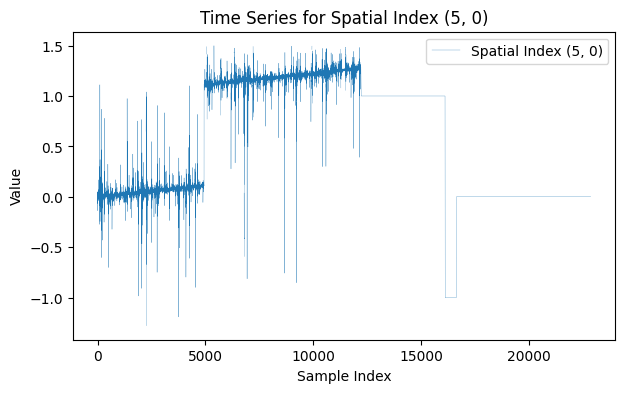

In [17]:
plt.figure(figsize=(7, 4))  # Set the figure size
plt.plot(range(1, len(selected_data) + 1), selected_data, label=f'Spatial Index {spatial_index}', linewidth=0.2)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title(f'Time Series for Spatial Index {spatial_index}')
plt.legend()
plt.show()

In [18]:
nan_indices = np.isnan(selected_data)

selected_data_without_nan = selected_data[~nan_indices]



In [19]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

y_values = selected_data_without_nan[:] # Replace this with your actual data

x_values = np.arange(len(y_values))

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
slope


-1.8343071013114968e-05

In [20]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming your data is a one-dimensional numpy array
y_values = selected_data_without_nan  # Replace this with your actual data

# Create x values corresponding to the indices
x_values = np.arange(len(y_values))

# Perform linear regression to get slope (k) and intercept (d)
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Generate the linear function based on the regression parameters
linear_function = lambda x: slope * x + intercept

# Generate new x values for the linear function
x_linear_function = np.linspace(0, len(y_values) - 1, num=1000)

# Calculate y values for the linear function
y_linear_function = linear_function(x_linear_function)



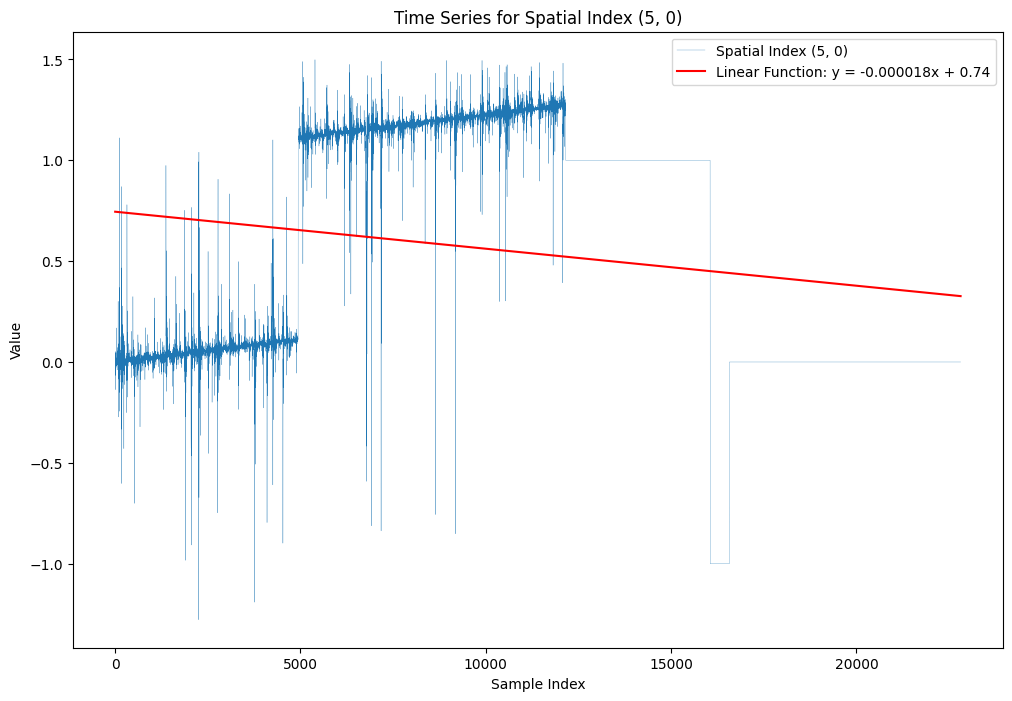

In [21]:
plt.figure(figsize=(12, 8)) 
plt.plot(range(1, len(selected_data_without_nan) + 1), selected_data_without_nan, label=f'Spatial Index {spatial_index}', linewidth=0.2)
plt.plot(x_linear_function, y_linear_function, color='red', label=f'Linear Function: y = {slope:.6f}x + {intercept:.2f}')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title(f'Time Series for Spatial Index {spatial_index}')
plt.legend()
plt.show()